In [1]:
from regain.datasets.hmm import generate_hmm
from regain.hmm.hmm_graphical_lasso import HMM_GraphicalLasso 
import numpy as np
from importlib import reload
import regain.hmm.utils; reload(regain.hmm.utils)
from regain.hmm.utils import results_recap
from regain.hmm.utils import cross_validation#,spread_pred_interpretation
from regain.hmm.utils_pred import Value_from_returns,thetas_comparison
import pickle as pkl
from notebooks.hmm.pred_func import pred_regression_methods
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

/Users/federicociech/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/federicociech/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [20]:
N_samples = 2000
N_states = 5
N_TS = 3
sigma_Normal = 1

dataset = generate_hmm(n_samples= N_samples,
                       n_states=N_states,
                       n_dim_obs=N_TS,
                       mode_precisions='regain_random',
                       mode_mean = 'Normal',
                       transition_type='fixed',
                       sigma=sigma_Normal)
N_pred = 30

[2002.51574818 2001.64062033 2006.99748862]


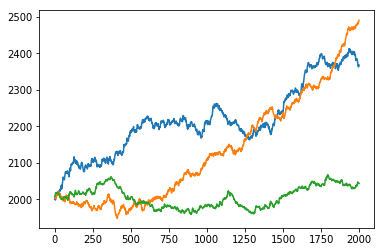

In [21]:
p_vec_0 = np.random.uniform(0,10,N_TS)+2000
Data = np.zeros((np.size(dataset['data'],axis=0),N_TS))
print(p_vec_0)
for j in range(N_TS):
    #print(p_vec_0[j])
    #print(np.cumsum(dataset['data'][:,j]))
    plt.plot(p_vec_0[j]+np.cumsum(dataset['data'][:,j]))
    Data[:,j] = p_vec_0[j]+np.cumsum(dataset['data'][:,j])
    
plt.show()

In [33]:
N_pred = 10

In [28]:
from regain.hmm.utils_pred import reg_pred_HMM_GMM
ret_pred,_, Val_Pred =   reg_pred_HMM_GMM(dataset['data'],
                                   Data,
                                   [0,15,30,45],
                                   [2,3,4,5],
                                   N_retrain = N_pred,
                                   N_val = 10,
                                   p=2,
                                   N_test = 10,
                                   meth = 'viterbi',
                                   pred_meth = 'rolling',
                                   recrossval = False,
                                   CV_meth = 'reg')

  0%|          | 0/4 [00:00<?, ?it/s]

Prev 0 Var 0



 50%|█████     | 2/4 [29:32<26:38, 799.15s/it]/Users/federicociech/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning

 25%|██▌       | 1/4 [09:32<28:38, 572.98s/it]/Users/federicociech/PycharmProjects/regain/regain/hmm/utils.py:97: RuntimeWarning: divide by zero encountered in log
  deltas[0, :] = np.log(pis * probs[0, :])
/Users/federicociech/PycharmProjects/regain/regain/hmm/utils.py:97: RuntimeWarning: divide by zero encountered in log
  deltas[0, :] = np.log(pis * probs[0, :])
/Users/federicociech/PycharmProjects/regain/regain/hmm/utils.py:97: RuntimeWarning: divide by zero encountered in log
  deltas[0, :] = np.log(pis * probs[0, :])

100%|██████████| 4/4 [5:44:06<00:00, 5161.70s/it]  

(45, 4)
1.2806098368793664



  0%|          | 0/4 [00:00<?, ?it/s]

MAE pred 0 Var 0 : 0.19026700223430915
Prev 0 Var 1



 50%|█████     | 2/4 [27:59<23:11, 695.94s/it]/Users/federicociech/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users/federicociech/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning

100%|██████████| 4/4 [5:20:08<00:00, 4802.03s/it]  

(0, 5)
0.7177885018811826



  0%|          | 0/4 [00:00<?, ?it/s]

MAE pred 0 Var 1 : 1.7714233737691802
Prev 0 Var 2



100%|██████████| 4/4 [4:14:30<00:00, 3817.72s/it]  

(45, 3)
1.155011016764552


MAE pred 0 Var 2 : 2.2490380438571993
Prev 1 Var 0
MAE pred 1 Var 0 : 3.9180710564143095
Prev 1 Var 1
MAE pred 1 Var 1 : 3.6452275552017266
Prev 1 Var 2
MAE pred 1 Var 2 : 1.171812789225097
Prev 2 Var 0
MAE pred 2 Var 0 : 2.5682000645673573
Prev 2 Var 1


/Users/federicociech/PycharmProjects/regain/regain/hmm/utils.py:97: RuntimeWarning: divide by zero encountered in log
  deltas[0, :] = np.log(pis * probs[0, :])


MAE pred 2 Var 1 : 1.9475579897055908
Prev 2 Var 2
MAE pred 2 Var 2 : 1.4760603469874862
Prev 3 Var 0
MAE pred 3 Var 0 : 0.40641720342811727
Prev 3 Var 1


/Users/federicociech/PycharmProjects/regain/regain/hmm/utils.py:97: RuntimeWarning: divide by zero encountered in log
  deltas[0, :] = np.log(pis * probs[0, :])


MAE pred 3 Var 1 : 1.1408076292743055
Prev 3 Var 2
MAE pred 3 Var 2 : 0.5894242942583905
Prev 4 Var 0
MAE pred 4 Var 0 : 0.1614027114212646
Prev 4 Var 1
MAE pred 4 Var 1 : 0.8081254129463264
Prev 4 Var 2
MAE pred 4 Var 2 : 1.4497422030177476
Prev 5 Var 0
MAE pred 5 Var 0 : 2.4604258713456755
Prev 5 Var 1
MAE pred 5 Var 1 : 2.8840252849438444
Prev 5 Var 2
MAE pred 5 Var 2 : 1.570434292392903
Prev 6 Var 0
MAE pred 6 Var 0 : 2.434554446663506
Prev 6 Var 1
MAE pred 6 Var 1 : 0.7772166840096412
Prev 6 Var 2
MAE pred 6 Var 2 : 0.3198633079261096
Prev 7 Var 0
MAE pred 7 Var 0 : 1.8082029993754163
Prev 7 Var 1
MAE pred 7 Var 1 : 1.7616032639054613
Prev 7 Var 2
MAE pred 7 Var 2 : 1.076334430198763
Prev 8 Var 0
MAE pred 8 Var 0 : 0.13404404818526094
Prev 8 Var 1
MAE pred 8 Var 1 : 1.1397105436281545
Prev 8 Var 2
MAE pred 8 Var 2 : 0.6416463330446409
Prev 9 Var 0
MAE pred 9 Var 0 : 1.2557479627132975
Prev 9 Var 1
MAE pred 9 Var 1 : 0.6165784747529102
Prev 9 Var 2
MAE pred 9 Var 2 : 0.038056198744

In [35]:
print(np.mean(abs(Val_Pred-Data[-N_pred:,:])))
print(Data[-N_pred:,:])
print(Val_Pred)
res_regre.append(Val_Pred)
methods.append('HHM_GGM')

1.413734060604573
[[2375.18264099 2479.84279168 2047.72100342]
 [2370.52738817 2483.14954159 2047.37876047]
 [2366.90688718 2484.85802545 2047.35842939]
 [2366.25759972 2483.7513782  2046.43513394]
 [2365.76907321 2482.93190269 2044.62302016]
 [2363.21790497 2485.57753594 2045.73200033]
 [2365.75108625 2486.44705928 2045.76534069]
 [2365.03270894 2489.05668069 2044.68285068]
 [2365.87573888 2490.0201666  2043.86903085]
 [2367.99707252 2490.99388547 2043.6263974 ]]
[[2375.37290799 2481.61421505 2045.47196537]
 [2374.44545923 2479.50431403 2048.55057326]
 [2369.47508724 2482.91046746 2048.83448974]
 [2366.66401692 2484.89218583 2047.02455823]
 [2365.93047592 2483.74002811 2046.07276236]
 [2365.67833084 2482.69351066 2044.16156604]
 [2363.3165318  2485.6698426  2045.44547739]
 [2366.84091194 2487.29507743 2045.75918511]
 [2366.00978293 2488.88045605 2044.51067718]
 [2366.74132456 2490.377307   2043.5883412 ]]


[1]	valid_0's l1: 1.50975	valid_0's l2: 2.9415
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l1: 1.49913	valid_0's l2: 2.87877
[3]	valid_0's l1: 1.49882	valid_0's l2: 2.86837
[4]	valid_0's l1: 1.49776	valid_0's l2: 2.86079
[5]	valid_0's l1: 1.48632	valid_0's l2: 2.82502
[6]	valid_0's l1: 1.50166	valid_0's l2: 2.87669
[7]	valid_0's l1: 1.51074	valid_0's l2: 2.92966
[8]	valid_0's l1: 1.51502	valid_0's l2: 2.93158
[9]	valid_0's l1: 1.50853	valid_0's l2: 2.94158
[10]	valid_0's l1: 1.51791	valid_0's l2: 2.98682
[11]	valid_0's l1: 1.50477	valid_0's l2: 2.96493
[12]	valid_0's l1: 1.49753	valid_0's l2: 2.92931
[13]	valid_0's l1: 1.49422	valid_0's l2: 2.96217
[14]	valid_0's l1: 1.49544	valid_0's l2: 2.96218
[15]	valid_0's l1: 1.49687	valid_0's l2: 2.94487
Early stopping, best iteration is:
[5]	valid_0's l1: 1.48632	valid_0's l2: 2.82502
[1]	valid_0's l1: 0.969247	valid_0's l2: 1.5504
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l1: 0.96

[1]	valid_0's l1: 2.16331	valid_0's l2: 6.27513
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l1: 2.17381	valid_0's l2: 6.2442
[3]	valid_0's l1: 2.17741	valid_0's l2: 6.24003
[4]	valid_0's l1: 2.18047	valid_0's l2: 6.18757
[5]	valid_0's l1: 2.15762	valid_0's l2: 6.11355
[6]	valid_0's l1: 2.18037	valid_0's l2: 6.19215
[7]	valid_0's l1: 2.172	valid_0's l2: 6.11353
[8]	valid_0's l1: 2.15521	valid_0's l2: 5.97924
[9]	valid_0's l1: 2.14225	valid_0's l2: 5.93691
[10]	valid_0's l1: 2.12902	valid_0's l2: 5.83416
[11]	valid_0's l1: 2.11585	valid_0's l2: 5.77133
[12]	valid_0's l1: 2.09972	valid_0's l2: 5.68934
[13]	valid_0's l1: 2.10324	valid_0's l2: 5.66063
[14]	valid_0's l1: 2.1012	valid_0's l2: 5.62071
[15]	valid_0's l1: 2.09892	valid_0's l2: 5.57538
[16]	valid_0's l1: 2.08982	valid_0's l2: 5.57535
[17]	valid_0's l1: 2.07705	valid_0's l2: 5.50303
[18]	valid_0's l1: 2.07182	valid_0's l2: 5.44055
[19]	valid_0's l1: 2.04439	valid_0's l2: 5.33076
[20]	valid_0's l1: 2.

[8]	valid_0's l1: 2.37852	valid_0's l2: 7.28883
[9]	valid_0's l1: 2.3827	valid_0's l2: 7.32274
[10]	valid_0's l1: 2.37134	valid_0's l2: 7.24776
[11]	valid_0's l1: 2.35232	valid_0's l2: 7.1752
[12]	valid_0's l1: 2.33832	valid_0's l2: 7.08184
[13]	valid_0's l1: 2.36004	valid_0's l2: 7.17798
[14]	valid_0's l1: 2.35416	valid_0's l2: 7.12414
[15]	valid_0's l1: 2.3351	valid_0's l2: 7.04538
[16]	valid_0's l1: 2.33308	valid_0's l2: 7.07565
[17]	valid_0's l1: 2.32667	valid_0's l2: 7.06799
[18]	valid_0's l1: 2.31371	valid_0's l2: 6.96074
[19]	valid_0's l1: 2.32901	valid_0's l2: 7.08866
[20]	valid_0's l1: 2.31226	valid_0's l2: 6.97512
[21]	valid_0's l1: 2.29832	valid_0's l2: 6.90326
[22]	valid_0's l1: 2.28714	valid_0's l2: 6.8387
[23]	valid_0's l1: 2.2995	valid_0's l2: 6.92841
[24]	valid_0's l1: 2.28314	valid_0's l2: 6.87202
[25]	valid_0's l1: 2.26774	valid_0's l2: 6.81081
[26]	valid_0's l1: 2.25673	valid_0's l2: 6.74982
[27]	valid_0's l1: 2.25336	valid_0's l2: 6.69729
[28]	valid_0's l1: 2.24924	

[46]	valid_0's l1: 2.05136	valid_0's l2: 5.76399
[47]	valid_0's l1: 2.04005	valid_0's l2: 5.71465
[48]	valid_0's l1: 2.04413	valid_0's l2: 5.70206
[49]	valid_0's l1: 2.04978	valid_0's l2: 5.70932
[50]	valid_0's l1: 2.05113	valid_0's l2: 5.69415
[51]	valid_0's l1: 2.05731	valid_0's l2: 5.71898
[52]	valid_0's l1: 2.05756	valid_0's l2: 5.72441
[53]	valid_0's l1: 2.0545	valid_0's l2: 5.73705
[54]	valid_0's l1: 2.06506	valid_0's l2: 5.78432
[55]	valid_0's l1: 2.0663	valid_0's l2: 5.78055
[56]	valid_0's l1: 2.06462	valid_0's l2: 5.7574
[57]	valid_0's l1: 2.07495	valid_0's l2: 5.77764
Early stopping, best iteration is:
[47]	valid_0's l1: 2.04005	valid_0's l2: 5.71465
[1]	valid_0's l1: 1.41405	valid_0's l2: 2.86916
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l1: 1.41973	valid_0's l2: 2.90092
[3]	valid_0's l1: 1.43042	valid_0's l2: 2.9546
[4]	valid_0's l1: 1.43835	valid_0's l2: 3.00217
[5]	valid_0's l1: 1.45296	valid_0's l2: 3.03594
[6]	valid_0's l1: 1.456	valid_0

Train on 1978 samples, validate on 10 samples
Epoch 1/50
 - 0s - loss: 2.0378 - val_loss: 1.5147
Epoch 2/50
 - 0s - loss: 2.0133 - val_loss: 1.5248
Epoch 3/50
 - 0s - loss: 1.9963 - val_loss: 1.5278
Epoch 4/50
 - 0s - loss: 1.9857 - val_loss: 1.5226
Epoch 5/50
 - 0s - loss: 1.9788 - val_loss: 1.5150
Epoch 6/50
 - 0s - loss: 1.9741 - val_loss: 1.5084
Epoch 7/50
 - 0s - loss: 1.9707 - val_loss: 1.4999
Epoch 8/50
 - 0s - loss: 1.9680 - val_loss: 1.4925
Epoch 9/50
 - 0s - loss: 1.9657 - val_loss: 1.4873
Epoch 10/50
 - 0s - loss: 1.9639 - val_loss: 1.4820
Epoch 11/50
 - 0s - loss: 1.9623 - val_loss: 1.4753
Epoch 12/50
 - 0s - loss: 1.9611 - val_loss: 1.4716
Epoch 13/50
 - 0s - loss: 1.9600 - val_loss: 1.4646
Epoch 14/50
 - 0s - loss: 1.9589 - val_loss: 1.4600
Epoch 15/50
 - 0s - loss: 1.9579 - val_loss: 1.4549
Epoch 16/50
 - 0s - loss: 1.9570 - val_loss: 1.4489
Epoch 17/50
 - 0s - loss: 1.9560 - val_loss: 1.4432
Epoch 18/50
 - 0s - loss: 1.9550 - val_loss: 1.4363
Epoch 19/50
 - 0s - loss: 1

Epoch 6/50
 - 0s - loss: 1.9766 - val_loss: 1.6421
Epoch 7/50
 - 0s - loss: 1.9731 - val_loss: 1.6258
Epoch 8/50
 - 0s - loss: 1.9703 - val_loss: 1.6092
Epoch 9/50
 - 0s - loss: 1.9680 - val_loss: 1.5933
Epoch 10/50
 - 0s - loss: 1.9660 - val_loss: 1.5821
Epoch 11/50
 - 0s - loss: 1.9641 - val_loss: 1.5709
Epoch 12/50
 - 0s - loss: 1.9629 - val_loss: 1.5638
Epoch 13/50
 - 0s - loss: 1.9616 - val_loss: 1.5563
Epoch 14/50
 - 0s - loss: 1.9603 - val_loss: 1.5484
Epoch 15/50
 - 0s - loss: 1.9591 - val_loss: 1.5413
Epoch 16/50
 - 0s - loss: 1.9582 - val_loss: 1.5368
Epoch 17/50
 - 0s - loss: 1.9571 - val_loss: 1.5268
Epoch 18/50
 - 0s - loss: 1.9560 - val_loss: 1.5186
Epoch 19/50
 - 0s - loss: 1.9550 - val_loss: 1.5116
Epoch 20/50
 - 0s - loss: 1.9540 - val_loss: 1.5047
Epoch 21/50
 - 0s - loss: 1.9530 - val_loss: 1.4986
Epoch 22/50
 - 0s - loss: 1.9520 - val_loss: 1.4910
Epoch 23/50
 - 0s - loss: 1.9511 - val_loss: 1.4843
Epoch 24/50
 - 0s - loss: 1.9502 - val_loss: 1.4783
Epoch 25/50
 - 0

Epoch 12/50
 - 0s - loss: 1.9614 - val_loss: 1.9060
Epoch 13/50
 - 0s - loss: 1.9600 - val_loss: 1.8958
Epoch 14/50
 - 0s - loss: 1.9588 - val_loss: 1.8887
Epoch 15/50
 - 0s - loss: 1.9575 - val_loss: 1.8769
Epoch 16/50
 - 0s - loss: 1.9564 - val_loss: 1.8666
Epoch 17/50
 - 0s - loss: 1.9554 - val_loss: 1.8578
Epoch 18/50
 - 0s - loss: 1.9545 - val_loss: 1.8507
Epoch 19/50
 - 0s - loss: 1.9534 - val_loss: 1.8455
Epoch 20/50
 - 0s - loss: 1.9525 - val_loss: 1.8406
Epoch 21/50
 - 0s - loss: 1.9516 - val_loss: 1.8370
Epoch 22/50
 - 0s - loss: 1.9505 - val_loss: 1.8311
Epoch 23/50
 - 0s - loss: 1.9495 - val_loss: 1.8261
Epoch 24/50
 - 0s - loss: 1.9483 - val_loss: 1.8175
Epoch 25/50
 - 0s - loss: 1.9475 - val_loss: 1.8129
Epoch 26/50
 - 0s - loss: 1.9465 - val_loss: 1.8058
Epoch 27/50
 - 0s - loss: 1.9453 - val_loss: 1.8024
Epoch 28/50
 - 0s - loss: 1.9446 - val_loss: 1.8017
Epoch 29/50
 - 0s - loss: 1.9434 - val_loss: 1.7962
Epoch 30/50
 - 0s - loss: 1.9424 - val_loss: 1.7948
Epoch 31/50


Epoch 18/50
 - 0s - loss: 1.9555 - val_loss: 2.0882
Epoch 19/50
 - 0s - loss: 1.9544 - val_loss: 2.0859
Epoch 20/50
 - 0s - loss: 1.9534 - val_loss: 2.0831
Epoch 21/50
 - 0s - loss: 1.9523 - val_loss: 2.0788
Epoch 22/50
 - 0s - loss: 1.9514 - val_loss: 2.0799
Epoch 23/50
 - 0s - loss: 1.9502 - val_loss: 2.0766
Epoch 24/50
 - 0s - loss: 1.9495 - val_loss: 2.0790
Epoch 25/50
 - 0s - loss: 1.9483 - val_loss: 2.0751
Epoch 26/50
 - 0s - loss: 1.9473 - val_loss: 2.0770
Epoch 27/50
 - 0s - loss: 1.9462 - val_loss: 2.0729
Epoch 28/50
 - 0s - loss: 1.9451 - val_loss: 2.0768
Epoch 29/50
 - 0s - loss: 1.9441 - val_loss: 2.0753
Epoch 30/50
 - 0s - loss: 1.9430 - val_loss: 2.0755
Epoch 31/50
 - 0s - loss: 1.9418 - val_loss: 2.0710
Epoch 32/50
 - 0s - loss: 1.9408 - val_loss: 2.0766
Epoch 33/50
 - 0s - loss: 1.9396 - val_loss: 2.0787
Epoch 34/50
 - 0s - loss: 1.9387 - val_loss: 2.0772
Epoch 35/50
 - 0s - loss: 1.9376 - val_loss: 2.0810
Epoch 36/50
 - 0s - loss: 1.9366 - val_loss: 2.0821
Epoch 37/50


Epoch 24/50
 - 0s - loss: 1.9452 - val_loss: 2.0416
Epoch 25/50
 - 0s - loss: 1.9442 - val_loss: 2.0349
Epoch 26/50
 - 0s - loss: 1.9432 - val_loss: 2.0318
Epoch 27/50
 - 0s - loss: 1.9423 - val_loss: 2.0258
Epoch 28/50
 - 0s - loss: 1.9414 - val_loss: 2.0290
Epoch 29/50
 - 0s - loss: 1.9405 - val_loss: 2.0250
Epoch 30/50
 - 0s - loss: 1.9396 - val_loss: 2.0234
Epoch 31/50
 - 0s - loss: 1.9386 - val_loss: 2.0219
Epoch 32/50
 - 0s - loss: 1.9378 - val_loss: 2.0238
Epoch 33/50
 - 0s - loss: 1.9369 - val_loss: 2.0272
Epoch 34/50
 - 0s - loss: 1.9360 - val_loss: 2.0221
Epoch 35/50
 - 0s - loss: 1.9350 - val_loss: 2.0219
Epoch 36/50
 - 0s - loss: 1.9341 - val_loss: 2.0245
Epoch 37/50
 - 0s - loss: 1.9332 - val_loss: 2.0271
Epoch 38/50
 - 0s - loss: 1.9323 - val_loss: 2.0282
Epoch 39/50
 - 0s - loss: 1.9314 - val_loss: 2.0290
Epoch 40/50
 - 0s - loss: 1.9305 - val_loss: 2.0332
Epoch 41/50
 - 0s - loss: 1.9297 - val_loss: 2.0338
Epoch 42/50
 - 0s - loss: 1.9288 - val_loss: 2.0371
Epoch 43/50


Epoch 30/50
 - 0s - loss: 1.9388 - val_loss: 1.9799
Epoch 31/50
 - 0s - loss: 1.9374 - val_loss: 1.9824
Epoch 32/50
 - 0s - loss: 1.9365 - val_loss: 1.9863
Epoch 33/50
 - 0s - loss: 1.9354 - val_loss: 1.9931
Epoch 34/50
 - 0s - loss: 1.9345 - val_loss: 1.9975
Epoch 35/50
 - 0s - loss: 1.9334 - val_loss: 2.0042
Epoch 36/50
 - 0s - loss: 1.9326 - val_loss: 2.0088
Epoch 37/50
 - 0s - loss: 1.9314 - val_loss: 2.0141
Epoch 38/50
 - 0s - loss: 1.9305 - val_loss: 2.0143
Epoch 39/50
 - 0s - loss: 1.9295 - val_loss: 2.0123
Epoch 40/50
 - 0s - loss: 1.9285 - val_loss: 2.0151
Epoch 41/50
 - 0s - loss: 1.9275 - val_loss: 2.0124
Epoch 42/50
 - 0s - loss: 1.9265 - val_loss: 2.0184
Epoch 43/50
 - 0s - loss: 1.9256 - val_loss: 2.0195
Epoch 44/50
 - 0s - loss: 1.9247 - val_loss: 2.0212
Epoch 45/50
 - 0s - loss: 1.9236 - val_loss: 2.0221
Epoch 46/50
 - 0s - loss: 1.9227 - val_loss: 2.0260
Epoch 47/50
 - 0s - loss: 1.9217 - val_loss: 2.0312
Epoch 48/50
 - 0s - loss: 1.9207 - val_loss: 2.0309
Epoch 49/50


Epoch 36/50
 - 0s - loss: 1.9338 - val_loss: 1.9337
Epoch 37/50
 - 0s - loss: 1.9328 - val_loss: 1.9400
Epoch 38/50
 - 0s - loss: 1.9320 - val_loss: 1.9540
Epoch 39/50
 - 0s - loss: 1.9311 - val_loss: 1.9522
Epoch 40/50
 - 0s - loss: 1.9302 - val_loss: 1.9551
Epoch 41/50
 - 0s - loss: 1.9293 - val_loss: 1.9589
Epoch 42/50
 - 0s - loss: 1.9284 - val_loss: 1.9608
Epoch 43/50
 - 0s - loss: 1.9276 - val_loss: 1.9633
Epoch 44/50
 - 0s - loss: 1.9267 - val_loss: 1.9634
Epoch 45/50
 - 0s - loss: 1.9260 - val_loss: 1.9665
Epoch 46/50
 - 0s - loss: 1.9250 - val_loss: 1.9634
Epoch 47/50
 - 0s - loss: 1.9244 - val_loss: 1.9709
Epoch 48/50
 - 0s - loss: 1.9232 - val_loss: 1.9687
Epoch 49/50
 - 0s - loss: 1.9226 - val_loss: 1.9744
Epoch 50/50
 - 0s - loss: 1.9216 - val_loss: 1.9783
Train on 1984 samples, validate on 10 samples
Epoch 1/50
 - 0s - loss: 1.7090 - val_loss: 1.4021
Epoch 2/50
 - 0s - loss: 1.6928 - val_loss: 1.4318
Epoch 3/50
 - 0s - loss: 1.6857 - val_loss: 1.4515
Epoch 4/50
 - 0s - lo

Epoch 42/50
 - 0s - loss: 1.9328 - val_loss: 1.9384
Epoch 43/50
 - 0s - loss: 1.9321 - val_loss: 1.9446
Epoch 44/50
 - 0s - loss: 1.9314 - val_loss: 1.9479
Epoch 45/50
 - 0s - loss: 1.9306 - val_loss: 1.9526
Epoch 46/50
 - 0s - loss: 1.9299 - val_loss: 1.9575
Epoch 47/50
 - 0s - loss: 1.9291 - val_loss: 1.9593
Epoch 48/50
 - 0s - loss: 1.9286 - val_loss: 1.9633
Epoch 49/50
 - 0s - loss: 1.9277 - val_loss: 1.9625
Epoch 50/50
 - 0s - loss: 1.9271 - val_loss: 1.9702
Train on 1985 samples, validate on 10 samples
Epoch 1/50
 - 0s - loss: 1.7041 - val_loss: 1.4308
Epoch 2/50
 - 0s - loss: 1.6902 - val_loss: 1.4760
Epoch 3/50
 - 0s - loss: 1.6838 - val_loss: 1.5076
Epoch 4/50
 - 0s - loss: 1.6801 - val_loss: 1.5301
Epoch 5/50
 - 0s - loss: 1.6779 - val_loss: 1.5440
Epoch 6/50
 - 0s - loss: 1.6764 - val_loss: 1.5538
Epoch 7/50
 - 0s - loss: 1.6753 - val_loss: 1.5580
Epoch 8/50
 - 0s - loss: 1.6745 - val_loss: 1.5599
Epoch 9/50
 - 0s - loss: 1.6736 - val_loss: 1.5626
Epoch 10/50
 - 0s - loss: 1

Epoch 48/50
 - 0s - loss: 1.9194 - val_loss: 2.0916
Epoch 49/50
 - 0s - loss: 1.9182 - val_loss: 2.0970
Epoch 50/50
 - 0s - loss: 1.9172 - val_loss: 2.1031
Train on 1986 samples, validate on 10 samples
Epoch 1/50
 - 0s - loss: 1.7019 - val_loss: 1.4708
Epoch 2/50
 - 0s - loss: 1.6892 - val_loss: 1.4779
Epoch 3/50
 - 0s - loss: 1.6842 - val_loss: 1.4824
Epoch 4/50
 - 0s - loss: 1.6815 - val_loss: 1.4871
Epoch 5/50
 - 0s - loss: 1.6797 - val_loss: 1.4877
Epoch 6/50
 - 0s - loss: 1.6784 - val_loss: 1.4869
Epoch 7/50
 - 0s - loss: 1.6772 - val_loss: 1.4859
Epoch 8/50
 - 0s - loss: 1.6763 - val_loss: 1.4846
Epoch 9/50
 - 0s - loss: 1.6754 - val_loss: 1.4836
Epoch 10/50
 - 0s - loss: 1.6746 - val_loss: 1.4829
Epoch 11/50
 - 0s - loss: 1.6738 - val_loss: 1.4814
Epoch 12/50
 - 0s - loss: 1.6731 - val_loss: 1.4796
Epoch 13/50
 - 0s - loss: 1.6724 - val_loss: 1.4781
Epoch 14/50
 - 0s - loss: 1.6716 - val_loss: 1.4779
Epoch 15/50
 - 0s - loss: 1.6710 - val_loss: 1.4766
Epoch 16/50
 - 0s - loss: 1

Epoch 3/50
 - 0s - loss: 1.6815 - val_loss: 1.4552
Epoch 4/50
 - 0s - loss: 1.6793 - val_loss: 1.4532
Epoch 5/50
 - 0s - loss: 1.6780 - val_loss: 1.4487
Epoch 6/50
 - 0s - loss: 1.6768 - val_loss: 1.4464
Epoch 7/50
 - 0s - loss: 1.6757 - val_loss: 1.4441
Epoch 8/50
 - 0s - loss: 1.6749 - val_loss: 1.4417
Epoch 9/50
 - 0s - loss: 1.6741 - val_loss: 1.4415
Epoch 10/50
 - 0s - loss: 1.6734 - val_loss: 1.4387
Epoch 11/50
 - 0s - loss: 1.6728 - val_loss: 1.4379
Epoch 12/50
 - 0s - loss: 1.6722 - val_loss: 1.4375
Epoch 13/50
 - 0s - loss: 1.6715 - val_loss: 1.4359
Epoch 14/50
 - 0s - loss: 1.6709 - val_loss: 1.4352
Epoch 15/50
 - 0s - loss: 1.6702 - val_loss: 1.4358
Epoch 16/50
 - 0s - loss: 1.6696 - val_loss: 1.4380
Epoch 17/50
 - 0s - loss: 1.6688 - val_loss: 1.4415
Epoch 18/50
 - 0s - loss: 1.6684 - val_loss: 1.4426
Epoch 19/50
 - 0s - loss: 1.6677 - val_loss: 1.4442
Epoch 20/50
 - 0s - loss: 1.6672 - val_loss: 1.4447
Epoch 21/50
 - 0s - loss: 1.6665 - val_loss: 1.4442
Epoch 22/50
 - 0s -

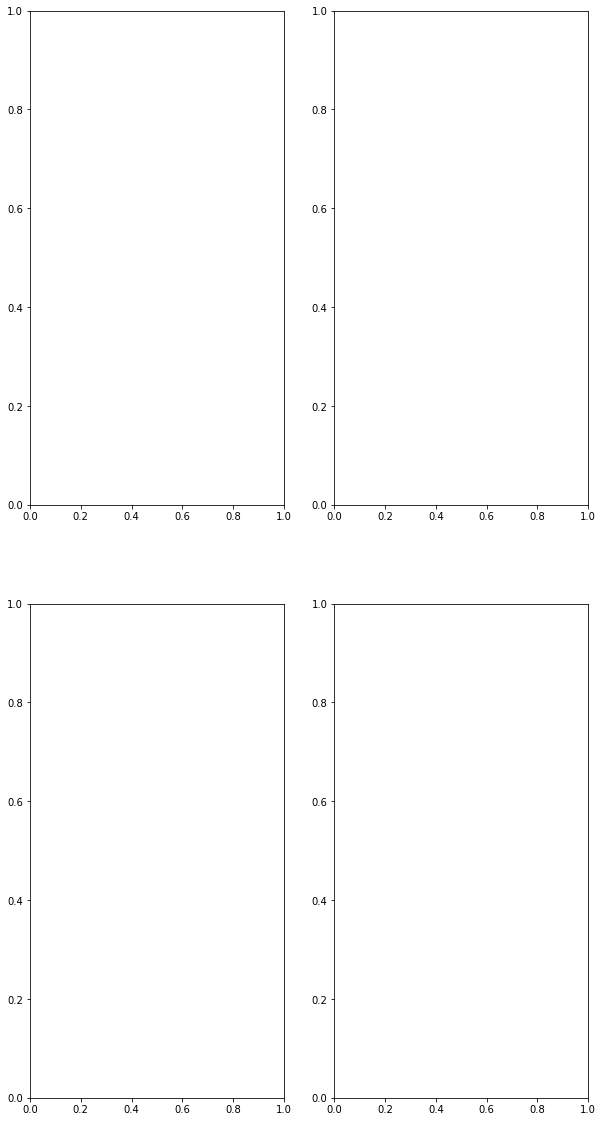

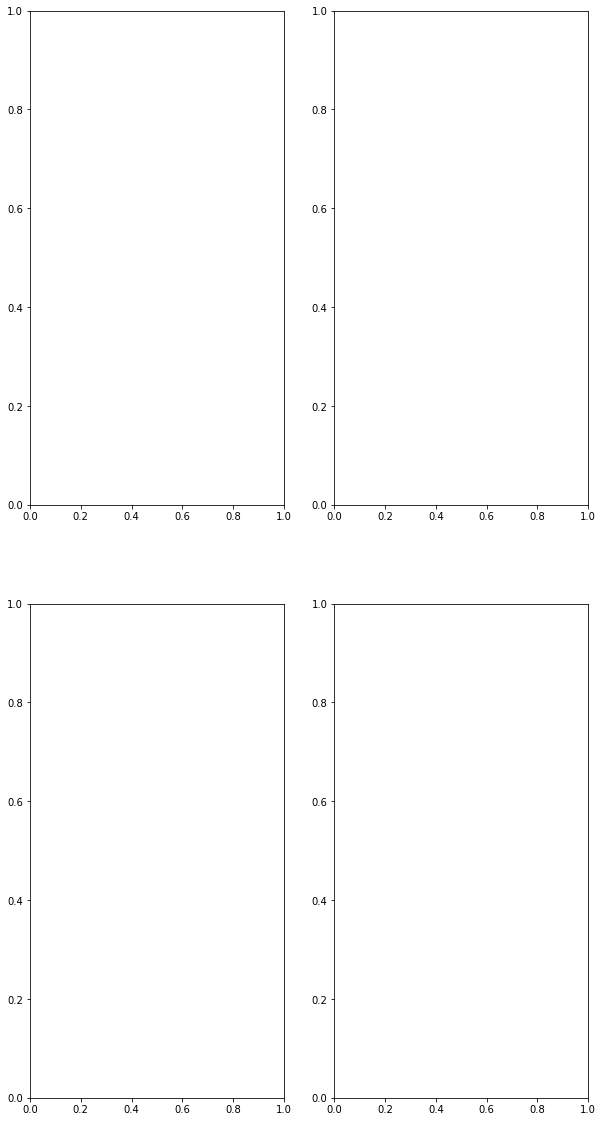

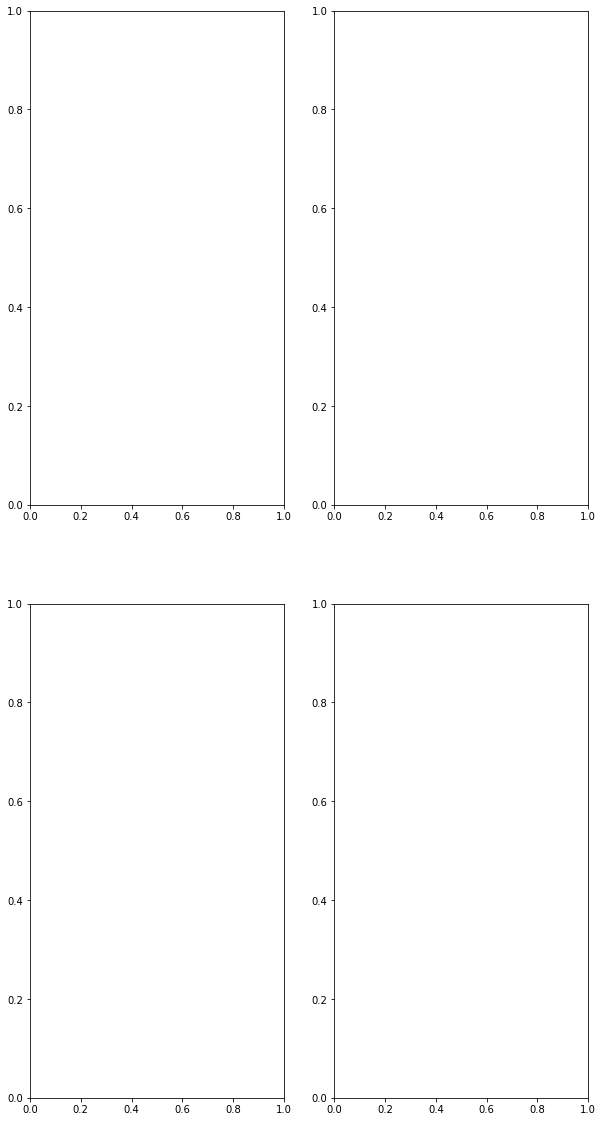

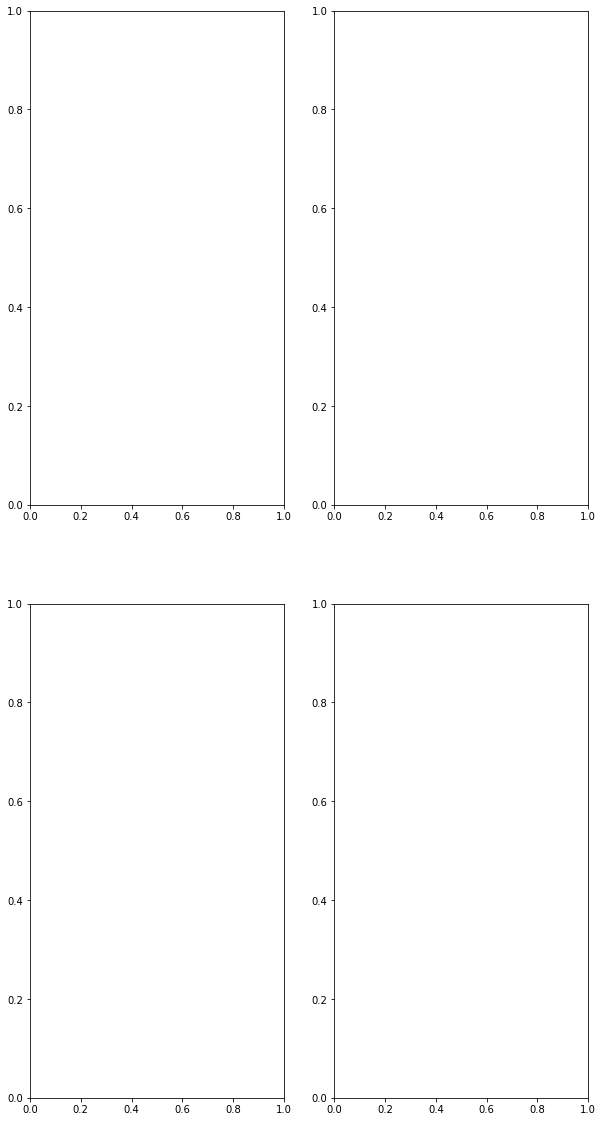

In [34]:
methods = ['lgb','LSTM','VAR','Kernel_RBF']

res_regre = []

for meth in methods:

    _, Val_pred, _ = pred_regression_methods(Data,dataset['data'],
                                    N_test=N_pred,
                                    method = meth,
                                    N_val = 10,
                                    pred_meth = 'rolling',
                                    p = 2,
                                    plot=False)
    res_regre.append(Val_pred)

In [ ]:
from regain.hmm.utils_pred import reg_pred_HMM_GMM
_,_, Val_Pred = reg_pred_HMM_GMM(dataset['data'],
                       Data,
                       [0,5,10,15,28,35,50],
                       [N_states],
                       N_retrain = 10,
                       p=2,
                       N_test = N_pred,
                       meth = 'viterbi',
                       pred_meth = 'rolling',
                       recrossval = False)
res_regre.append(Val_Pred)
methods.append('HHM_GGM2')

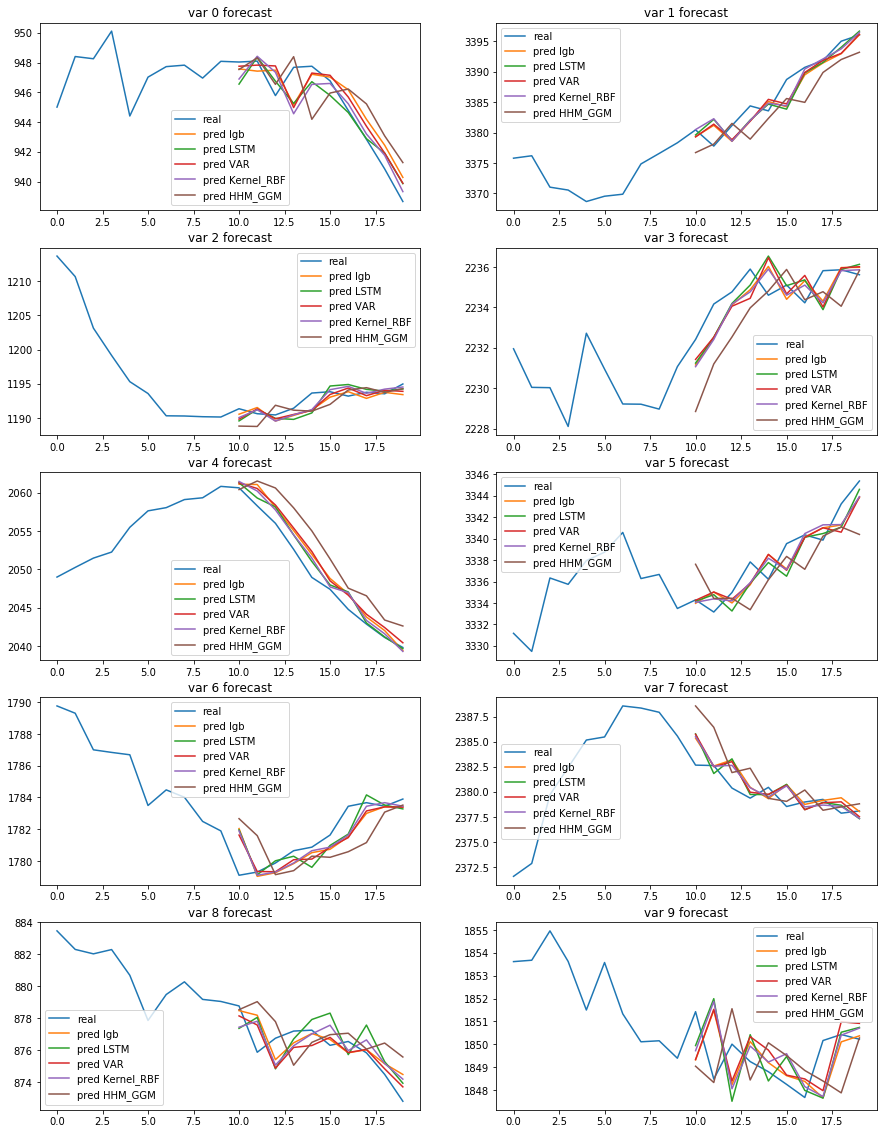

In [13]:
figsizex=15
figsizey=20
N_per_rows=2
N_mem = 10
N_test = N_pred
Dates = None
columns = None
N_TS = np.size(Data, axis=1)

N_rows = int(np.ceil(N_TS / N_per_rows))
f, axes = plt.subplots(N_rows, N_per_rows, figsize=(figsizex, figsizey))

for ts in range(N_TS):
    i = int(ts / N_per_rows)
    j = np.remainder(ts, N_per_rows)
    
    for n,Value_pred in enumerate(res_regre):

        if Dates is None:
            x_mem = np.arange(N_mem + N_test)
            x = np.arange(N_mem,N_mem + N_test)
            if n==0:
                axes[i, j].plot(x_mem, Data[-(N_mem+N_test):,ts],label='real')
                #axes[i, j].plot(x, Data[-(N_test):,ts], 'o', label='real')
            axes[i, j].plot(x, Value_pred[:,ts],  label='pred '+str(methods[n]))
            if columns is None:
                axes[i, j].set_title('var ' + str(ts) + ' forecast')
            else:
                axes[i, j].set_title(str(columns[ts]) + ' forecast')

        axes[i, j].legend()

In [20]:
# CV hmm_gmm 

hmm_gmm = HMM_GraphicalLasso(alpha=25,
                             n_clusters=N_states,
                             verbose=False,
                             mode='scaled',
                             warm_restart=True,
                             repetitions=5,
                             n_jobs=-1)

hmm_gmm.fit(dataset['data'])

print(hmm_gmm.lambdas)

print(results_recap(dataset['states'],hmm_gmm.labels_,dataset['thetas'],hmm_gmm.precisions_))

[0.13424959 0.12673471 0.18566999 3.22796054 0.05272872]
{'homogeneity [0, 1]': 0.8670663420099415, 'completeness [0, 1]': 0.9145452842851869, 'v_measure [0, 1]': 0.8901731696672721, 'adjusted_mutual_info [0, 1]': 0.8894790359814645, 'weighted_mean_mcc [-1, 1]': (0.485164613052282,), 'max_cluster_mean_mcc[-1,1]': (0.508966424242636,), 'weighted_mean_f1 [0, 1]': (0.543169672020227,), 'max_cluster_mean_f1[0,1]': (0.5533272837265578,), 'probabilities_clusters': (array([[0.01092896, 0.98492462, 0.        , 0.        , 0.        ],
       [0.2295082 , 0.01005025, 0.0075188 , 0.        , 0.0041841 ],
       [0.00546448, 0.00502513, 0.98496241, 0.        , 0.        ],
       [0.7431694 , 0.        , 0.0075188 , 0.        , 0.0041841 ],
       [0.01092896, 0.        , 0.        , 1.        , 0.9916318 ]]),), 'max_probabilities_couples': ['Couple: (4, 3), Probability: 1.0, MCC: 0.4638062947716077, F1_score: 0.33333333333333337', 'Couple: (4, 4), Probability: 0.9916317991631799, MCC: 0.44082515

In [21]:
from regain.hmm.utils_pred import pred_HMM_GMM
returns = pred_HMM_GMM(dataset['data'],
                       Data,
                       [28],
                       [N_states],
                       N_retrain = 10,
                       N_test = N_pred,
                       meth = 'viterbi',
                       pred_meth = 'rolling',
                       recrossval = False)

100%|██████████| 1/1 [00:46<00:00, 46.93s/it]


IndexError: index 1000 is out of bounds for axis 0 with size 1000

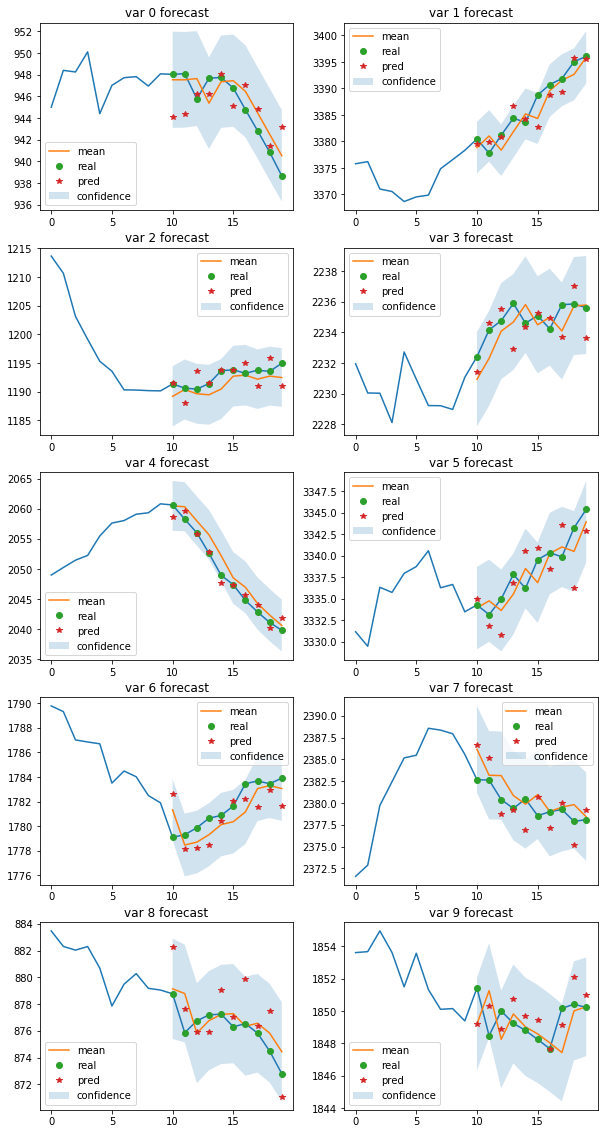

In [23]:
from regain.hmm.utils_pred import pred_from_N_past_days
res = pred_from_N_past_days(dataset['data'],Data,N_past_days=50,N_test=N_pred,pred_meth = 'rolling')

In [24]:
Value, Value_mean = Value_from_returns(Data, returns,N_pred, pred_meth='rolling', perc_var=False)

In [25]:
Value_res, Value_mean_res = Value_from_returns(Data, res,N_pred, pred_meth='rolling', perc_var=False)

In [26]:
res_regre.append(Value)
res_regre.append(Value_mean)
res_regre.append(Value_res)
res_regre.append(Value_mean_res)

In [27]:
methods.append('HMM-GMM')
methods.append('HMM-GMM mean')
methods.append('Last 50 days')
methods.append('Last 50 days mean')

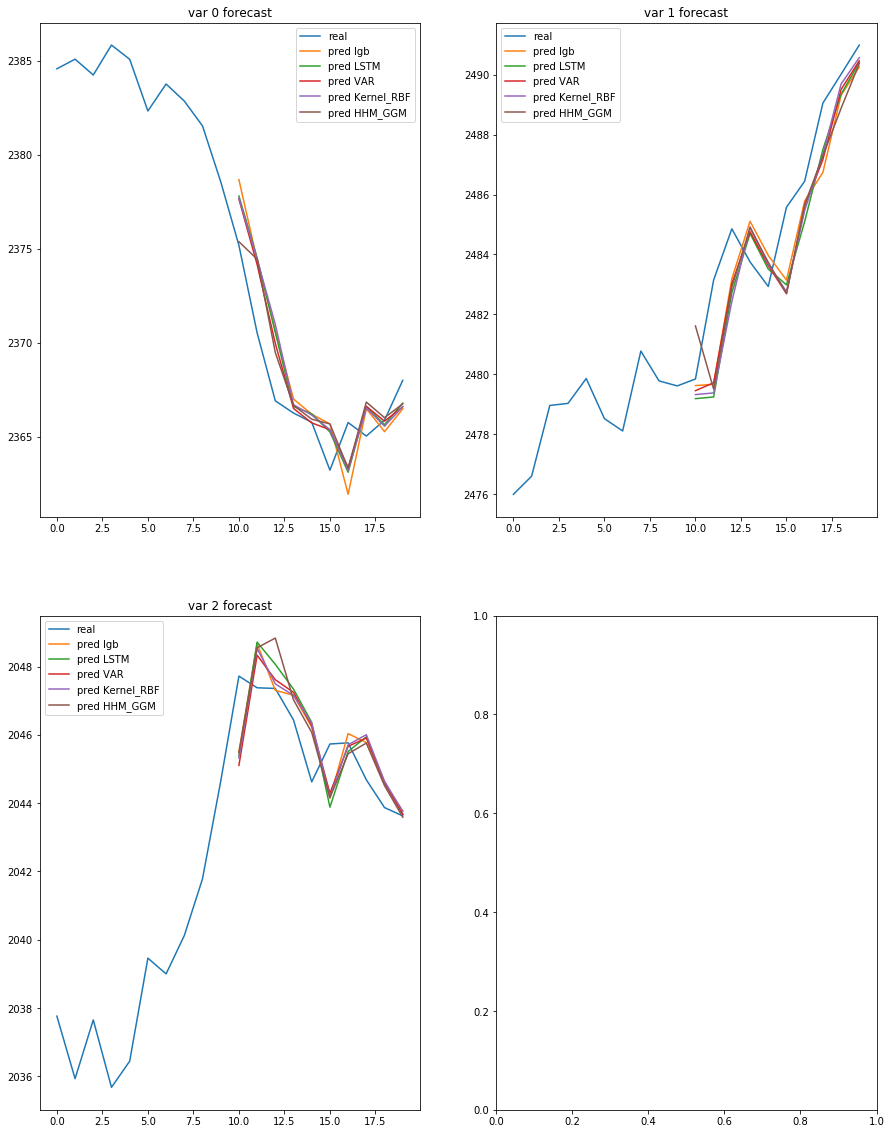

In [36]:
figsizex=15
figsizey=20
N_per_rows=2
N_mem = 10
N_test = N_pred
Dates = None
columns = None
N_TS = np.size(Data, axis=1)

N_rows = int(np.ceil(N_TS / N_per_rows))
f, axes = plt.subplots(N_rows, N_per_rows, figsize=(figsizex, figsizey))
list_all = []
for ts in range(N_TS):
    i = int(ts / N_per_rows)
    j = np.remainder(ts, N_per_rows)
    
    for n,Value_pred in enumerate(res_regre):
        
        absolute_error = abs(Data[-(N_test):,ts]-Value_pred[:,ts])
        MAE = np.mean(absolute_error)
        std = np.std(absolute_error)
        

        if Dates is None:
            x_mem = np.arange(N_mem + N_test)
            x = np.arange(N_mem,N_mem + N_test)
            if n==0:
                axes[i, j].plot(x_mem, Data[-(N_mem+N_test):,ts],label='real')
                #axes[i, j].plot(x, Data[-(N_test):,ts], 'o', label='real')
            axes[i, j].plot(x, Value_pred[:,ts],  label='pred '+str(methods[n]))
            if columns is None:
                axes[i, j].set_title('var ' + str(ts) + ' forecast')
                list_all.append([str(methods[n]),'var ' + str(ts),MAE,std])
            else:
                axes[i, j].set_title(str(columns[ts]) + ' forecast')
                list_all.append([str(methods[n]),str(columns[ts]),MAE,std])

        axes[i, j].legend()

In [37]:
import pandas as pd
df_recap = pd.DataFrame(list_all, columns=['method', 'TS', 'MAE', 'std AB'])

In [46]:
with open('Pred_K5.pickle', 'wb') as f:
    pkl.dump([dataset,Data,res_regre,df_recap], f)

In [15]:
df_recap.loc[df_recap['method'] == 'LSTM']['MAE'].mean()

1.4955830651259248

In [39]:
print(df_recap.to_string())

        method     TS       MAE    std AB
0          lgb  var 0  2.214637  1.355259
1         LSTM  var 0  1.874577  1.277927
2          VAR  var 0  1.702632  1.206522
3   Kernel_RBF  var 0  1.922794  1.302252
4      HHM_GGM  var 0  1.533733  1.244837
5          lgb  var 1  1.460609  0.964444
6         LSTM  var 1  1.497094  1.039430
7          VAR  var 1  1.399501  1.015044
8   Kernel_RBF  var 1  1.490702  1.106578
9      HHM_GGM  var 1  1.649228  0.931537
10         lgb  var 2  0.969483  0.677053
11        LSTM  var 2  1.115079  0.688306
12         VAR  var 2  0.983890  0.751449
13  Kernel_RBF  var 2  0.996150  0.738183
14     HHM_GGM  var 2  1.058241  0.632513


In [1]:
import pickle
with open('Pred_K5.pickle', 'rb') as f:
    [dataset,Data,res_regre,df_recap] =  pickle.load(f)

In [2]:
N_pred = 10
from regain.hmm.utils_pred import reg_pred_HMM_GMM
ret_pred,_, Val_Pred =   reg_pred_HMM_GMM(dataset['data'],
                                   Data,
                                   [45],
                                   [3],
                                   N_retrain = N_pred,
                                   N_val = 10,
                                   p=2,
                                   N_test = 10,
                                   meth = 'viterbi',
                                   pred_meth = 'rolling',
                                   recrossval = False,
                                   CV_meth = 'reg',
                                   single_var = True,
                                   var=1)

/Users/federicociech/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/Users/federicociech/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)
  0%|          | 0/1 [00:00<?, ?it/s]

Prev 0 Var 1



100%|██████████| 1/1 [19:54<00:00, 1194.94s/it]

(45, 3)
1.1175298436361922


MAE pred 0 Var 1 : 0.47117168627755
Prev 1 Var 1
MAE pred 1 Var 1 : 3.549699504203861
Prev 2 Var 1
MAE pred 2 Var 1 : 1.947585065550873
Prev 3 Var 1
MAE pred 3 Var 1 : 1.5819421441042187
Prev 4 Var 1
MAE pred 4 Var 1 : 0.8081532500049333
Prev 5 Var 1
MAE pred 5 Var 1 : 2.8839761704667684
Prev 6 Var 1
MAE pred 6 Var 1 : 0.7769268218309648
Prev 7 Var 1
MAE pred 7 Var 1 : 1.7615820158604931
Prev 8 Var 1
MAE pred 8 Var 1 : 0.5468243764486568
Prev 9 Var 1
MAE pred 9 Var 1 : 0.6165613242760104


In [4]:
import numpy as np
print(np.mean(abs(Val_Pred-Data[-N_pred:,1])))

1.4944422359023974


In [7]:
(1.49+1.53+1.05)/3

1.3566666666666667